<a href="https://colab.research.google.com/github/seremmartin64-ops/ML/blob/main/Market_Basket_Analysis_using_Apriori_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# MARKET BASKET ANALYSIS
# ITEMS THAT ARE FREQUENTLY BOUGHT TOGETHER

# Apriori Algorithm Concepts
# a) Support
# b) Confidence
# c) Lift
# d) Conviction

# @title Default title text
# Market Basket Analysis Uses Apriori Algorithm, which is an Unsupervised Machine Learning
# Algorithm that is used to associate one item set to another.

#Components of Apriori
#1. Support
#2. Confidence
#3. Lift

#-- Support
    #Support refers to the default popularity of any product. You find the support as a quotient of the division of the number of transactions comprising that product
    #by the total number of transactions. Hence, we get
    #Support (Biscuits) = (Transactions relating biscuits) / (Total transactions)
    #= 400/4000 = 10 percent.

#-- Confidence
    # Confidence refers tchocolateso the posgoogle.com/jno-gwid-tmvsibility that the customers bought both biscuits and
    # chocolates together. So, you need to divide the number of transactions that
    # comprise both biscuits and chocolates by the total number of biscuit transactions
    # Confidence = (Transactions relating both biscuits and Chocolate) / (Total
    # transactions involving Biscuits)
    # = 200/400
    # = 50 percent.

#-- Lift
    #Consider the above example; lift refers to the increase in the ratio of the sale of chocolates when you sell biscuits.
    # The mathematical equations of lift are given below.
    # Lift = (Confidence (Biscuits - chocolates)/ (Support (Biscuits)
    # = 50/10 = 5
    # It means that the probability of people buying both biscuits and chocolates together is five times more than that of purchasing the biscuits alone.
    # If the lift value is below one, it requires that the people are unlikely to buy both the items together. Larger the value, the better is the combination.

# We read our transactional data direct from a URL without kaggle

import pandas as pd
data = pd.read_csv("https://msi.martial.co.ke/data/OnlineRetail.csv")
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [ ]:
# Step2: Data Transformation

# a) Checking for Empty Records and Removing them.

data.isnull().sum()
data.dropna(inplace=True)
data.isnull().sum()


,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


<Axes: xlabel='Country'>

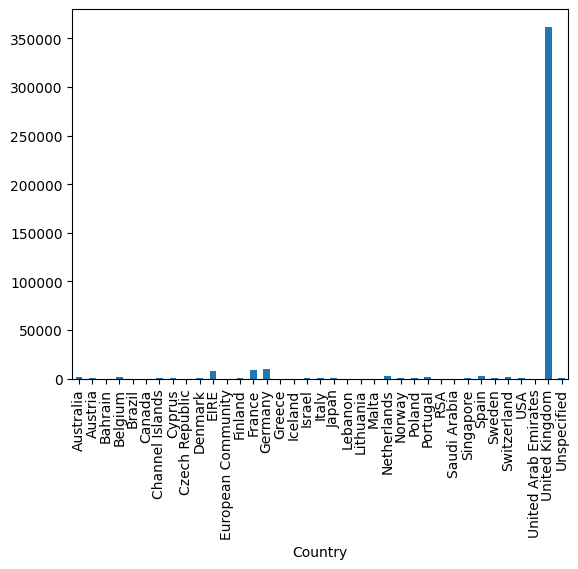

In [ ]:
# This Retailer was Operating on Different European Countries
# There we want to identify the countries and then pick one specific country

data.groupby("Country").size().plot(kind='bar')

<Axes: >

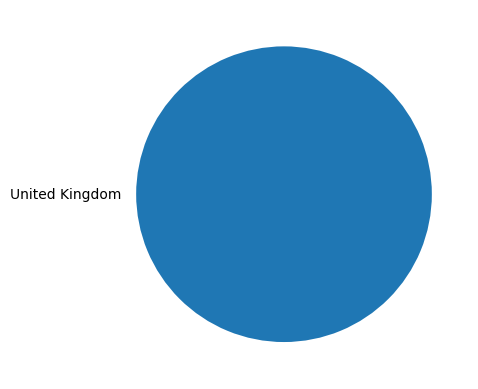

In [ ]:
# Here we are picking transactions for one Specific Region
# United Kingdom(Most Active Region)

condition = data['Country'] == "United Kingdom"

data = data[condition]
data.groupby("Country").size().plot(kind='pie')

In [ ]:
# Step5: Creating the Basket(Pick Columns for InvoiceNo, Description, Quantity)
basket = data.groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo')
basket


Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TOADSTOOL BEDSIDE LIGHT,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C581484,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C581490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-11.0,0.0,0.0,0.0,0.0
C581499,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Step6: One-Hot Encoding
# One-Hot Encoding
# It replaces any value more than 0 with 1
# Any quantity more than zero(0), will be indicated as 1

# Any quantity more than zero(0), will be indicated as 1

def encode_quantities(x):
    if x <= 0:
        return 0
    if x > 0:
        return 1

basket_sets = basket.applymap(encode_quantities)
basket_sets

/tmp/ipython-input-2783579831.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_sets = basket.applymap(encode_quantities)


Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TOADSTOOL BEDSIDE LIGHT,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C581484,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C581490,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C581499,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Finally lets apply the Apriori Algorithm
# import association rules and apriori from mlextend library
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [ ]:
# Determine the Frequeent Items

import warnings
warnings.filterwarnings('ignore')

frequent_itemsets = apriori(basket_sets, min_support=0.02, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.031626,(6 RIBBONS RUSTIC CHARM)
1,0.021604,(60 CAKE CASES VINTAGE CHRISTMAS)
2,0.029561,(60 TEATIME FAIRY CAKE CASES)
3,0.022360,(72 SWEETHEART FAIRY CAKE CASES)
4,0.034748,(ALARM CLOCK BAKELIKE GREEN)
...,...,...
159,0.020648,"(LUNCH BAG RED RETROSPOT, LUNCH BAG SPACEBOY D..."
160,0.020648,"(LUNCH BAG SUKI DESIGN , LUNCH BAG RED RETROSPOT)"
161,0.022007,"(PAPER CHAIN KIT 50'S CHRISTMAS , PAPER CHAIN ..."
162,0.021554,"(RED HANGING HEART T-LIGHT HOLDER, WHITE HANGI..."


In [ ]:
# Apply the Association Rules
# antecedents(X):
# consequent(Y)
association_rules(frequent_itemsets, metric="lift", min_threshold=1)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.038173,0.034748,0.022863,0.598945,17.236584,1.0,0.021537,2.406779,0.979369,0.456740,0.584507,0.628458
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.034748,0.038173,0.022863,0.657971,17.236584,1.0,0.021537,2.812121,0.975895,0.456740,0.644397,0.628458
2,(GARDENERS KNEELING PAD KEEP CALM ),(GARDENERS KNEELING PAD CUP OF TEA ),0.037367,0.031576,0.023065,0.617251,19.548240,1.0,0.021885,2.530179,0.985676,0.502744,0.604771,0.673857
3,(GARDENERS KNEELING PAD CUP OF TEA ),(GARDENERS KNEELING PAD KEEP CALM ),0.031576,0.037367,0.023065,0.730463,19.548240,1.0,0.021885,3.571425,0.979782,0.502744,0.720000,0.673857
4,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.024828,0.030820,0.020345,0.819473,26.588673,1.0,0.019580,5.368602,0.986892,0.576320,0.813732,0.739802
5,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.030820,0.024828,0.020345,0.660131,26.588673,1.0,0.019580,2.869257,0.992994,0.576320,0.651478,0.739802
6,(ROSES REGENCY TEACUP AND SAUCER ),(GREEN REGENCY TEACUP AND SAUCER),0.034144,0.030820,0.023971,0.702065,22.779253,1.0,0.022919,3.252989,0.989900,0.584767,0.692590,0.739921
7,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.030820,0.034144,0.023971,0.777778,22.779253,1.0,0.022919,4.346351,0.986505,0.584767,0.769922,0.739921
8,(HEART OF WICKER SMALL),(HEART OF WICKER LARGE),0.046734,0.039835,0.020043,0.428879,10.766443,1.0,0.018182,1.681195,0.951591,0.301287,0.405185,0.466020
9,(HEART OF WICKER LARGE),(HEART OF WICKER SMALL),0.039835,0.046734,0.020043,0.503161,10.766443,1.0,0.018182,1.918660,0.944753,0.301287,0.478803,0.466020
